In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. What is the difference between supervised and  unsupervised machine learning?

##### Supervised learning
When an algorithm is trained on a labelled dataset—that is, when the input data used for training is paired with corresponding output labels—it is referred to as supervised learning. Supervised learning aims to find a mapping or relationship between the input variables and the desired output, which enables the algorithm to produce precise predictions or classifications when faced with fresh, unobserved data.

An input-output pair training set is given to the algorithm during a supervised learning process. For every example in the training set, the algorithm iteratively modifies its parameters to minimize the discrepancy between its predicted output and the actual output (the ground truth). This procedure keeps going until the algorithm performs at an acceptable level. 

Supervised learning can be divided into two main types:

- Regression: In regression problems, the goal is to predict a continuous output or value. For example, predicting the price of a house based on its features, such as the number of bedrooms, square footage, and location.
- Classification: In classification problems, the goal is to assign input data to one of several predefined categories or classes. Examples include spam email detection, image classification (e.g., identifying whether an image contains a cat or a dog), and sentiment analysis.

##### Unsupervised Learning
Unsupervised learning is a type of machine learning where the algorithm is given input data without explicit instructions on what to do with it. In unsupervised learning, the algorithm tries to find patterns, structures, or relationships in the data without the guidance of labelled output.

The main goal of unsupervised learning is often to explore the inherent structure within a set of data points. This can involve identifying clusters of similar data points, detecting outliers, reducing the dimensionality of the data, or discovering patterns and associations.

There are several common types of unsupervised learning techniques:

- Clustering: Clustering algorithms aim to group similar data points into clusters based on some similarity metric. K-means clustering and hierarchical clustering are examples of unsupervised clustering techniques.
- Dimensionality Reduction: These techniques aim to reduce the number of features (or dimensions) in the data while preserving its essential information. Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) are examples of dimensionality reduction methods.
- Association: Association rule learning is used to discover interesting relationships or associations between variables in large datasets. The Apriori algorithm is a well-known example used for association rule learning.

### 2. Explain the concept of clustering using different methods in unsupervised learning

“Clustering” is the process of grouping similar entities together. The goal of this unsupervised machine learning technique is to find similarities in the data point and group similar data points together.

#### K-mean Clustering
It starts with K as the input which is how many clusters you want to find. Place K centroids in random locations in your space.
Now, using the euclidean distance between data points and centroids, assign each data point to the cluster which is close to it.
Recalculate the cluster centers as a mean of data points assigned to it.
Repeat 2 and 3 until no further changes occur.
Now, you might be thinking that how do I decide the value of K in the first step.

One of the methods is called “Elbow” method can be used to decide an optimal number of clusters. Here you would run K-mean clustering on a range of K values and plot the “percentage of variance explained” on the Y-axis and “K” on X-axis.

In the picture below you would notice that as we add more clusters after 3 it doesn't give much better modeling on the data. The first cluster adds much information, but at some point, the marginal gain will start dropping.



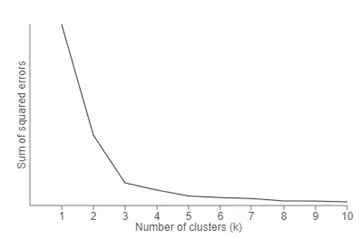

#### Hierarchical Clustering
Unlike K-mean clustering Hierarchical clustering starts by assigning all data points as their own cluster. As the name suggests it builds the hierarchy and in the next step, it combines the two nearest data point and merges it together to one cluster.

1. Assign each data point to its own cluster.

2. Find closest pair of cluster using euclidean distance and merge them in to single cluster.

3. Calculate distance between two nearest clusters and combine until all items are clustered in to a single cluster.

In this technique, you can decide the optimal number of clusters by noticing which vertical lines can be cut by horizontal line without intersecting a cluster and covers the maximum distance.

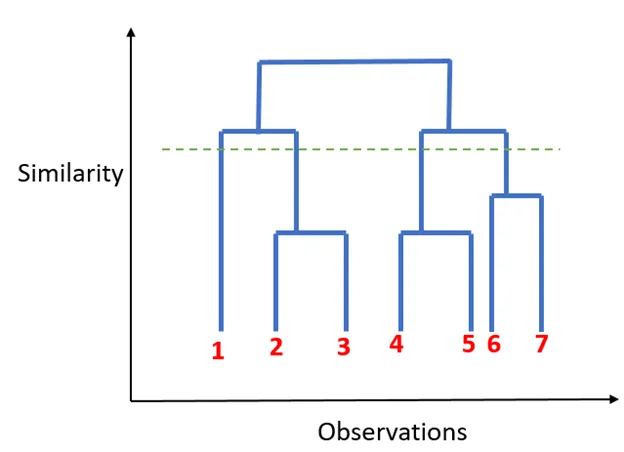

### 3. Load the Customer_Churn dataset.

In [3]:
df=pd.read_csv("customer_churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### a. Build the kmeans algorithm on top of ‘customer  features’. For the model, the number of clusters should be 3.

In [5]:
df_temp=df.drop("customerID",axis=1)

In [6]:
df_temp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
object_columns=[fea for fea in df_temp.columns if df_temp[fea].dtype=="object"]

In [9]:
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
for column in object_columns:
 df_temp[column]=le.fit_transform(df_temp[column])

In [12]:
train_dt_temp=df_temp.drop("Churn",axis=1);

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters=3, random_state=0, n_init="auto")
yp = km.fit_predict(train_dt_temp)
yp

array([0, 2, 2, ..., 0, 0, 1])

#### b. Calculate the clustering vector values for the  monthly charges column form the customer_features.

In [16]:
monthly_charges =train_dt_temp['MonthlyCharges'].values.reshape(-1, 1)


# Fit the model to your data
km.fit(monthly_charges)

# Get the clustering vector values
clustering_vector = km.labels_

print(clustering_vector)

[0 2 2 ... 0 2 1]


#### c. Bind the monthly charges column to the clustering vector and store that data in month_group.


In [23]:
from sklearn.cluster import KMeans
ms = KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=42)
month_group=ms.fit_predict(train_dt_temp['MonthlyCharges'].values.reshape(-1,1))

In [24]:
month_group

array([2, 0, 0, ..., 2, 0, 1])

#### d. Separate all the 3 clusters with their values.

In [25]:
cluster1=km.cluster_centers_[0]
cluster2=km.cluster_centers_[1]
cluster3=km.cluster_centers_[2]

In [26]:
print(f"Cluster1 \n {cluster1}")
print(f"Cluster2 \n {cluster2}")
print(f"Cluster3 \n {cluster3}")


Cluster1 
 [5.09114583e-01 1.73177083e-01 4.82204861e-01 2.99479167e-01
 3.37630208e+01 8.87152778e-01 9.44444444e-01 6.94010417e-01
 7.88628472e-01 9.28385417e-01 9.20572917e-01 8.13802083e-01
 9.62239583e-01 9.80468750e-01 6.53211806e-01 6.16319444e-01
 1.53732639e+00 6.78184896e+01 3.32732031e+03]
Cluster2 
 [4.96491228e-01 1.77192982e-01 5.32894737e-01 2.97807018e-01
 3.78548246e+01 9.46491228e-01 1.09035088e+00 9.16228070e-01
 8.46929825e-01 1.01359649e+00 1.02850877e+00 8.60087719e-01
 1.16447368e+00 1.17675439e+00 8.51315789e-01 6.38157895e-01
 1.48596491e+00 7.43357895e+01 5.47841798e+03]
Cluster3 
 [5.08336722e-01 1.37860919e-01 4.37576251e-01 3.01342009e-01
 2.59825132e+01 8.77999187e-01 7.97885319e-01 1.00040667e+00
 7.38511590e-01 7.86498577e-01 7.74298495e-01 7.23058154e-01
 8.40992273e-01 8.32858886e-01 5.76250508e-01 5.27043514e-01
 1.69093127e+00 5.30204148e+01 1.13367426e+03]


#### e. Write interference how k-mean is different from KNN from above result.

- K-means clustering: It is an unsupervised learning algorithm used for clustering data points into groups or clusters based on their similarities.
- K-nearest neighbors (KNN): It is a supervised learning algorithm used for classification and regression tasks. KNN identifies the k nearest neighbors to a given data point based on some distance metric and assigns the class or value based on the majority vote or averaging.

- K-means clustering: The objective of K-means is to partition the data into k clusters such that each data point belongs to the cluster with the nearest mean, minimizing the within-cluster variance.
- K-nearest neighbors (KNN): The objective of KNN is to classify or predict the class or value of a data point based on the majority class or average value of its k nearest neighbors.

K-means clustering and K-nearest neighbors (KNN) are fundamentally different algorithms with distinct objectives, input requirements, and areas of application. While K-means aims to partition data into clusters based on similarity, KNN focuses on predicting labels or values for data points based on the labels or values of their nearest neighbors.




